In [ ]:
a = [1,2,3]
a+a[:-1][::-1]

[1, 2, 3, 2, 1]

In [ ]:
a = 200
a//2

100

In [ ]:
class Person:
    def __init__(self, first_name, last_name, age):
        self.first_name = first_name
        self.last_name = last_name
        self.age = age    
    
    def __repr__(self):
        return f'Person("{self.first_name}","{self.last_name}",{self.age})'

In [ ]:
person = Person('John', 'Doe', 25)
person

Person("John","Doe",25)

In [ ]:
import numpy as np
a = np.arange(1, 10, 1)
a = a.reshape(-1,3)
print(a)
print(np.vstack(a))
# np.allclose(np.vstack(a), a.flatten())

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
import argparse
parser = argparse.ArgumentParser()
parser.parse_args()

usage: ipykernel_launcher.py [-h]
ipykernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel-47df27c9-6095-4aac-a488-38109cd9f265.json


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

conv_1 = nn.Conv2d(1, 32, 2, 2)
conv_2 = nn.Conv2d(32, 64, 2, 2)
conv_3 = nn.Conv2d(64, 128, 3, 2)
fc_1 = nn.Linear(128*3*3, 10)
fc_2 = nn.Linear(10, 128*3*3)
trans_conv_3 = nn.ConvTranspose2d(128, 64, 3, 2)
trans_conv_2 = nn.ConvTranspose2d(64, 32, 2, 2)
trans_conv_1 = nn.ConvTranspose2d(32, 1, 2, 2)
x = torch.rand(1, 1, 28, 28)
print(x.shape)
x = F.relu(conv_1(x))
print(x.shape)
x = F.relu(conv_2(x))
print(x.shape)
x = F.relu(conv_3(x))
print(x.shape)
x = F.relu(fc_1(x.view(-1, 128*3*3)))
print(x.shape)
x = F.relu(fc_2(x))
print(x.shape)
x = F.relu(trans_conv_3(x.reshape(-1, 128, 3, 3)))
print(x.shape)
x = F.relu(trans_conv_2(x))
print(x.shape)
x = F.relu(trans_conv_1(x))
print(x.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 32, 14, 14])
torch.Size([1, 64, 7, 7])
torch.Size([1, 128, 3, 3])
torch.Size([1, 10])
torch.Size([1, 1152])
torch.Size([1, 64, 7, 7])
torch.Size([1, 32, 14, 14])
torch.Size([1, 1, 28, 28])


In [ ]:
trans_conv_3 = nn.ConvTranspose2d(128, 64, 3, 2)
y = torch.rand(1, 128, 3, 3)
print(y.shape)
y = trans_conv_3(y)
print(y.shape)

torch.Size([1, 128, 3, 3])
torch.Size([1, 64, 7, 7])


In [ ]:
a = [5,4,3,4,3]
for id, a1 in enumerate(a):
  print(id, a1)

0 5
1 4
2 3
3 4
4 3


In [ ]:
b = a[::-1]
for id, (a0, b0) in enumerate(zip(a, b)):
  print(id, a0, b0)

0 5 3
1 4 4
2 3 3
3 4 4
4 3 5


In [ ]:
kernel_sizes = [2,2,3]
out = 28
for kernel_size in kernel_sizes:
  out = (out-kernel_size)//2 + 1
print(out)

3


In [ ]:
import math
math.sqrt(2)

1.4142135623730951

In [ ]:
a[-1]

3

In [ ]:
import torch
import torch.nn as nn

model = nn.Sequential(nn.Conv2d(1, 32, 2, 2),
                      nn.ReLU(),
                      nn.Conv2d(32, 64, 2, 2),
                      nn.ReLU(),
                      nn.Conv2d(64, 128, 3, 2),
                      nn.ReLU()
                    )
x = torch.rand(1, 1, 28, 28)
y = model(x)
[param.device for param in model.parameters()]

[device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu'),
 device(type='cpu')]

In [ ]:
a = torch.rand(1,1,28,28)
a.device

device(type='cpu')

In [2]:
from collections import OrderedDict
import torch.nn as nn
import torch 

hidden_channels = [32, 64, 128]
kernel_sizes = [2, 2, 3]
input_channels = 1

layers = OrderedDict()
for idx, (hidden_channel, kernel_size) in enumerate(zip(hidden_channels, kernel_sizes)):
    if idx == 0:
        layers.update(
            {
                'conv0': nn.Conv2d(input_channels, hidden_channel, kernel_size=kernel_size, stride=2),
                'activation0': nn.ReLU()   
            }
        )
    else:
        layers.update(
            {
                'conv{}'.format(idx): nn.Conv2d(
                    hidden_channels[idx-1], hidden_channel, kernel_size=kernel_size, stride=2),
                'activation{}'.format(idx): nn.ReLU(),
                'bn{}'.format(idx): nn.BatchNorm2d(hidden_channel)
            }
        )

In [22]:
x = torch.rand(64,1,28,28)
y = []
for layer in layers:
  x = layers[layer](x)
  if layer[:-1] == 'conv':
    y.append(x)
y[2].shape

torch.Size([64, 128, 3, 3])

In [1]:
a = [1,2,3,4]
for i, b in enumerate(a):
  print(i, b)

0 1
1 2
2 3
3 4


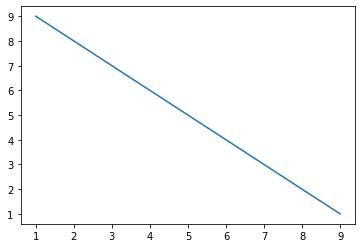

In [5]:
import numpy as np
import matplotlib.pyplot as plt
a = np.arange(1, 10, 1).tolist()
b = a[::-1]
plt.plot(a, b)

In [14]:
# extracting patches
import torch
x= torch.rand(64,1,28,28)
x = x.unsqueeze(0)
print(x.shape)
y = x.unfold(3, 14, 4).unfold(4, 14, 4)
print(y.shape)
y = y.reshape(1, 64, -1, 14, 14)
print(y.shape)
y = y.squeeze(0)
print(y.shape)

torch.Size([1, 64, 1, 28, 28])
torch.Size([1, 64, 1, 4, 4, 14, 14])
torch.Size([1, 64, 16, 14, 14])
torch.Size([64, 16, 14, 14])
